In [1]:
from sklearn.metrics import adjusted_rand_score

#peut etre regarder en combien de temps il y a 10.000 nouveaux clients/commandes

#faire un échantillon de 10.OOO individus
#faire tourner l'algo sur cet échantillon
#comparer les résultats avec l'ari_score

#ajouter 10.OOO individus
#faire tourner l'algo sur cet échantillon
#comparer le résultat avec l'ari score

#montrer l'évolution de l'ari score ???

a = [0, 0, 1, 1, 2, 2]
b = [0, 0, 1, 1, 1, 2]

ari_score = adjusted_rand_score(a, b)

print(ari_score)

0.4444444444444444


In [2]:
a = [0, 0, 1, 1, 2, 2]
b = [0, 0, 1, 1, 1, 2]

ari_score = adjusted_rand_score(a, b)

print(ari_score)

0.4444444444444444


Prendre un échantillon du max, genre 70.000, faire tourner l'algo de clustering dessus
obtenir le clustering et le garder variable A


garder les 30.000 restant et les ajouter progressivement les individus dans une variable Abis dans des tranches de 15 jours, 


effectuer l'algo sur tous les individus, retirer les nouveau individu et comparer le clustering Abis avec la variable A 


répeter un certain nombre de fois jusqu'à ce que le score de l'ARI ne soit plus satisfaisant

In [3]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [4]:
df = pd.read_csv('../Data/4.KMeans_dataset.csv')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,total_amount,total_shipping,Recency_x,Frequency_x,Recency_y,Frequency_y,Monetary,Cluster
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares,38.71,82.82,27.289810,2,27.289810,2,1.303348,3
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery,141.46,141.46,14.162002,1,14.162002,1,1.601216,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto,179.12,179.12,13.051752,1,13.051752,1,1.647432,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,no title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,-19.840168,-43.923299,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,pet_shop,72.20,72.20,25.737451,1,25.737451,1,1.457031,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5.0,no title,no message,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,-23.551707,-46.260979,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784,stationer

In [5]:
df['order_status'] = df['order_status'].replace('delivered', 7)
df['order_status'] = df['order_status'].replace('shipped', 6)
df['order_status'] = df['order_status'].replace('processing', 5)
df['order_status'] = df['order_status'].replace('invoiced', 4)
df['order_status'] = df['order_status'].replace('approved', 3)
df['order_status'] = df['order_status'].replace('created', 2)
df['order_status'] = df['order_status'].replace('canceled', 1)
df['order_status'] = df['order_status'].replace('unavailable', 0)

index_noScore = df[df['review_score'] == 'no score'].index
df.drop(index_noScore, inplace=True)

df['review_score'] = df['review_score'].astype('float')

labelencoder = LabelEncoder()
df['product_category_name_english'] = labelencoder.fit_transform(df['product_category_name_english'])

In [6]:
df_ARI = []
df_ARI = pd.DataFrame(df_ARI)
df_ARI['customer_unique_id'] = df['customer_unique_id']
df_ARI['order_purchase_timestamp'] = df['order_purchase_timestamp']
df_ARI['order_status'] = df['order_status']
df_ARI['product_category_name_english'] = df['product_category_name_english']
df_ARI['Recency'] = df['Recency_y']
df_ARI['Frequency'] = df['Frequency_y']
df_ARI['Monetary'] = df['Monetary']
df_ARI['Cluster'] = df['Cluster']
df_ARI

,customer_unique_id,order_purchase_timestamp,order_status,product_category_name_english,Recency,Frequency,Monetary,Cluster
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,7,49,27.289810,2,1.303348,3
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,7,60,14.162002,1,1.601216,0
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,7,5,13.051752,1,1.647432,0
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,7,61,25.737451,1,1.457031,1
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,7,67,22.505471,1,1.220373,0
...,...,...,...,...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,7,43,33.093157,1,1.494089,1
96092,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,7,6,22.786720,1,1.663569,0
96093,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,7,45,28.407875,1,1.723809,1
96094,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,7,15,23.908753,1,1.686544,1


In [7]:
df_ARI = df_ARI.sort_values(by='order_purchase_timestamp')
df_ARI

,customer_unique_id,order_purchase_timestamp,order_status,product_category_name_english,Recency,Frequency,Monetary,Cluster
4536,b7d76e111c89f7ebf14761390f0f7d17,2016-09-04 21:15:19,6,39,37.380079,1,1.455305,1
4391,4854e9b3feff728c13ee5fc7d1547e92,2016-09-05 00:15:34,1,57,37.358694,1,0.000000,2
10037,009b0127b727ab0ba422f6d9604487c7,2016-09-13 15:24:19,1,57,37.187047,1,0.000000,2
30350,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,7,43,37.143977,1,1.357931,1
80714,0eb1ee9dba87f5b36b4613a65074337c,2016-10-02 22:07:52,1,57,36.775265,1,0.000000,2
...,...,...,...,...,...,...,...,...
1801,08642cd329066fe11ec63293f714f2f8,2018-09-20 13:54:16,1,57,9.015414,2,0.000000,2
33546,9c3af16efacb7aa06aa3bc674556c5d6,2018-09-25 11:59:18,1,57,8.405957,2,0.000000,2
49501,9bb92bebd4cb7511e1a02d5e50bc4655,2018-09-29 09:13:03,1,57,7.882219,1,0.000000,2
66750,262e1f1e26e92e86375f86840b4ffd63,2018-10-16 20:16:02,1,57,5.071228,2,0.000000,2


In [8]:
df_train = df_ARI.iloc[:50000].copy()
df_test = df_ARI.iloc[50000:].copy()

In [9]:
df_test['order_purchase_timestamp'] = pd.to_datetime(df_test['order_purchase_timestamp'])

In [10]:
start_date = df_test['order_purchase_timestamp'].min()
end_date = start_date + pd.Timedelta(days=15)

df_sample_date = df_test.loc[df_test['order_purchase_timestamp'].between(start_date, end_date)]

df_sample_date

,customer_unique_id,order_purchase_timestamp,order_status,product_category_name_english,Recency,Frequency,Monetary,Cluster
41692,e7b135b2f9ae921f40a96f2aa0293cd3,2018-01-30 21:20:02,7,69,23.063749,1,1.388534,1
51481,08039fb6eaae076bc566a78b3b7477bb,2018-01-30 21:21:09,7,60,23.063749,1,1.725770,1
48162,65e5edd61ac7c02048ae3553b67a9475,2018-01-30 21:21:36,7,5,23.063749,1,1.597640,1
93246,48b511caf413b87a24afcd5a4749c238,2018-01-30 21:22:50,6,7,23.063749,1,1.567394,1
90641,d698bd39faadf5e16c1bab185ae712de,2018-01-30 21:24:28,7,5,23.063749,1,1.165527,1
...,...,...,...,...,...,...,...,...
80964,65447e533394d2842e4b069aa9366f8c,2018-02-14 21:13:45,7,28,22.464937,1,1.489201,0
43526,7af87661a92c6dd8347715433698be80,2018-02-14 21:13:52,7,49,22.464937,1,1.782507,0
48149,be67532fc39882705fb872774520f301,2018-02-14 21:16:40,7,39,22.464937,1,1.650261,0
77920,8ed5c9e86c5523080c5ca26609825599,2018-02-14 21:17:34,7,66,22.464937,1,1.516671,0


variable de debut de boucle date de début
variable temporaire de fin d'échantillon

boucle sur l'ensemble des 30.000 individus
    variable de debut de boucle date de début
    variable temporaire de fin d'échantillon

    ajouter les individus au df 70.000 individu
    effectuer un modèle ML
    ajouter cluster au tableau

    retirer échantillon du tableau
    analyser tableau cluster avec tableau test avec ARI
    ajouter valeur ARI dans un tableau

    retour en haut



end date = 0

boucle 

    start date = min.date + end date  0 + 0 / 0 + 15 / 0 + 30
    end date = start date + 15jours 0 + 15 / 15 + 15 / 30 + 15

    

In [11]:
i = 0
time = 0
end_date = pd.Timedelta(days=time)
date_max = df_test['order_purchase_timestamp'].max()
start_date = df_test['order_purchase_timestamp'].min()

while start_date < date_max:
    end_date = pd.Timedelta(days=time)
    start_date = df_test['order_purchase_timestamp'].min() + end_date
    end_date = start_date + pd.Timedelta(days=15)

    print(f"Date début: {start_date}")
    print(f"Date fin: {end_date}")

    time+=15
    i+=1

Date début: 2018-01-30 21:20:02
Date fin: 2018-02-14 21:20:02
Date début: 2018-02-14 21:20:02
Date fin: 2018-03-01 21:20:02
Date début: 2018-03-01 21:20:02
Date fin: 2018-03-16 21:20:02
Date début: 2018-03-16 21:20:02
Date fin: 2018-03-31 21:20:02
Date début: 2018-03-31 21:20:02
Date fin: 2018-04-15 21:20:02
Date début: 2018-04-15 21:20:02
Date fin: 2018-04-30 21:20:02
Date début: 2018-04-30 21:20:02
Date fin: 2018-05-15 21:20:02
Date début: 2018-05-15 21:20:02
Date fin: 2018-05-30 21:20:02
Date début: 2018-05-30 21:20:02
Date fin: 2018-06-14 21:20:02
Date début: 2018-06-14 21:20:02
Date fin: 2018-06-29 21:20:02
Date début: 2018-06-29 21:20:02
Date fin: 2018-07-14 21:20:02
Date début: 2018-07-14 21:20:02
Date fin: 2018-07-29 21:20:02
Date début: 2018-07-29 21:20:02
Date fin: 2018-08-13 21:20:02
Date début: 2018-08-13 21:20:02
Date fin: 2018-08-28 21:20:02
Date début: 2018-08-28 21:20:02
Date fin: 2018-09-12 21:20:02
Date début: 2018-09-12 21:20:02
Date fin: 2018-09-27 21:20:02
Date déb

In [12]:
start_date = df_test['order_purchase_timestamp'].max()
start_date

Timestamp('2018-10-17 17:30:18')

In [13]:
df_train

,customer_unique_id,order_purchase_timestamp,order_status,product_category_name_english,Recency,Frequency,Monetary,Cluster
4536,b7d76e111c89f7ebf14761390f0f7d17,2016-09-04 21:15:19,6,39,37.380079,1,1.455305,1
4391,4854e9b3feff728c13ee5fc7d1547e92,2016-09-05 00:15:34,1,57,37.358694,1,0.000000,2
10037,009b0127b727ab0ba422f6d9604487c7,2016-09-13 15:24:19,1,57,37.187047,1,0.000000,2
30350,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,7,43,37.143977,1,1.357931,1
80714,0eb1ee9dba87f5b36b4613a65074337c,2016-10-02 22:07:52,1,57,36.775265,1,0.000000,2
...,...,...,...,...,...,...,...,...
88725,f5de0974b0dc4ead386b56789c975824,2018-01-30 20:53:01,7,60,23.063749,1,1.592546,1
65462,1b65fd272cbc940f443d36bebdfd2ec0,2018-01-30 21:05:55,7,49,23.063749,1,1.309284,1
61626,c01d60d37b02b3483e3f1d74f8910756,2018-01-30 21:06:30,7,15,23.063749,1,1.348167,1
80747,fe83a1eecb94d049cd92b9a759d63cae,2018-01-30 21:08:20,7,71,23.063749,1,1.686795,1


In [14]:
from sklearn import cluster, metrics
from sklearn import preprocessing


df_train = df_train.drop('order_purchase_timestamp', axis=1)
X = df_train.drop('customer_unique_id', axis=1).values
X_norm1 = preprocessing.scale(X)

cls1 = cluster.KMeans(n_clusters=5)
cls1.fit(X_norm1)

cls1.labels_

array([4, 2, 2, ..., 3, 0, 0], dtype=int32)

In [15]:
df_train_2 = df_train.copy()
testX = []
time = 5

date_max = df_test['order_purchase_timestamp'].max()
start_date = df_test['order_purchase_timestamp'].min()

i = df_test['order_purchase_timestamp'].min()

while i < date_max:
    df_train_2 = df_train.copy()
    start_date = df_test['order_purchase_timestamp'].min()
    end_date = start_date + pd.Timedelta(days=time)

    
    df_sample_date = df_test.loc[df_test['order_purchase_timestamp'].between(start_date, end_date)]
    df_train_2 = pd.concat([df_train_2, df_sample_date], ignore_index=True)

    df_train_2 = df_train_2.drop('order_purchase_timestamp', axis=1)
    X = df_train_2.drop('customer_unique_id', axis=1).values
    X_norm1 = preprocessing.scale(X)

    cls2 = cluster.KMeans(n_clusters=5)
    cls2.fit(X_norm1)

    cls2.labels_ = cls2.labels_[:len(cls1.labels_)]

    ari_score = adjusted_rand_score(cls1.labels_, cls2.labels_)

    testX.append(ari_score)
    #print(ari_score)

    time+=5
    i = df_test['order_purchase_timestamp'].min() + pd.Timedelta(days=time)

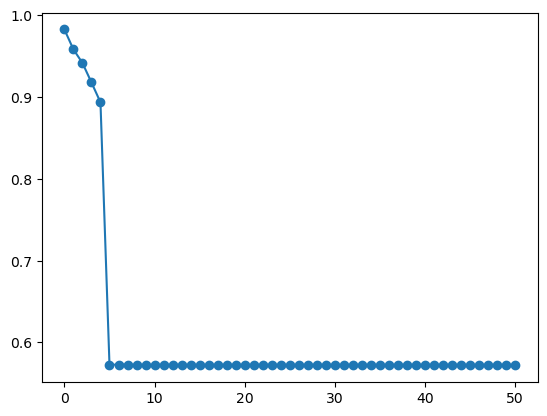

In [21]:
plt.plot(testX, marker='o')
plt.show()